<a href="https://colab.research.google.com/github/udayLab/PAMI/blob/main/notebooks/fuzzyCorrelatedPattern/basic/FCPGrowth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discovering Fuzzy Correlated Patterns in Big Data Using FCPGrowth Algorithm

In this tutorial, we will discuss the first approach to find Fuzzy Correlated Patterns in big data using FCPGrowth algorithm.

 [__Basic approach:__](#basicApproach) Here, we present the steps to discover Fuzzy Correlated Patterns using a single minimum support value


***

## <a id='basicApproach'>Basic approach: Executing FCPGrowth on a single dataset at a particular minimum support value</a>

#### Step 0 : Install latest version of PAMI library

In [1]:
!pip install -U PAMI

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.6/884.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 16.1 MB/s eta 0:00:00
  Created wheel for JsonForm: filename=JsonForm-0.0.2-py3-none-any.whl size=3313 sha256=58b958dd52837049a46454df905e23a47b8641a6e3ef780423cfda954c02d63e
  Stored in directory: /root/.cache/pip/wheels/b6/e5/87/11026246d3bd4ad67c0615682d2d6748bbd9a40ac0490882bd
  Created wheel for JsonSir: filename=JsonSir-0.0.2-py3-none-any.whl size=4753 sha256=e86477d0452da7d16c6d856fc51a542f4e55419c9ba4fac324b7790e8d52ec1b
  Stored in directory: /root/.cache/pip/wheels/1d/4c/d3/4d9757425983b43eb709be1043d82cd03fb863ce5f56f117e6
Successfully built JsonForm JsonSir


2.   Downloading a sample dataset

In [3]:
!wget -nc https://u-aizu.ac.jp/~udayrage/datasets/fuzzyDatabases/Fuzzy_T10I4D100K.csv #download a sample fuzzy database

--2023-11-17 16:09:07--  https://u-aizu.ac.jp/~udayrage/datasets/fuzzyDatabases/Fuzzy_T10I4D100K.csv
Resolving u-aizu.ac.jp (u-aizu.ac.jp)... 150.95.161.176, 150.31.244.160
Connecting to u-aizu.ac.jp (u-aizu.ac.jp)|150.95.161.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9151461 (8.7M) [text/csv]
Saving to: ‘Fuzzy_T10I4D100K.csv’

Fuzzy_T10I4D100K.cs 100%[===================>]   8.73M  1.89MB/s    in 5.6s    

2023-11-17 16:09:14 (1.56 MB/s) - ‘Fuzzy_T10I4D100K.csv’ saved [9151461/9151461]



3.   Printing few lines of a dataset to know its format.

In [4]:
!head -2 Fuzzy_T10I4D100K.csv

25.L	25.M	52.H	164.H	240.H	274.H	328.L	368.H	448.H	538.H	561.H	630.H	687.H	730.H	775.H	825.H	834.H:0.4	0.6	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	 
39.H	120.H	124.H	205.H	401.H	581.H	704.H	814.H	825.H	834.H:1	1	1	1	1	1	1	1	1	1	 


format: every row contains items seperated by a seperator.

Example:

item1 item2 item3 item4

item1 item4 item6
***

## Part 1: Finding Frequent patterns using FFIMiner

### Step 1: Import the FFIMiner algorithm

In [2]:
from PAMI.fuzzyCorrelatedPattern.basic import FCPGrowth  as alg

### Step 2: Specify the following input parameters

In [5]:
inputFile = 'Fuzzy_T10I4D100K.csv'

minimumSupportCount=1200  #Users can also specify this constraint between 0 to 1.
minAllConf=0.8
seperator='\t'

### Step 3: Execute the FCPGrowth algorithm

In [6]:
obj = alg.FCPGrowth(iFile=inputFile, minSup=minimumSupportCount,minAllConf=minAllConf,sep=seperator)    #initialize
obj.mine()            #Start the mining process

Fuzzy Correlated Patterns Successfully generated using FCPGrowth algorithms


### Step 4: Storing the generated patterns

#### Step 4.1: Storing the generated patterns in a file

In [7]:
obj.save(outFile='frequentPatternsMinSupCount1000.txt')

#### Step 4.2. Storing the generated patterns in a data frame

In [8]:
frequentPatternsDF= obj.getPatternsAsDataFrame()

### Step 5: Getting the statistics

#### Step 5.1: Total number of discovered patterns

In [9]:
print('Total No of patterns: ' + str(len(frequentPatternsDF)))

Total No of patterns: 22


#### Step 5.2: Runtime consumed by the mining algorithm

In [10]:
print('Runtime: ' + str(obj.getRuntime()))

Runtime: 369.0968441963196


#### Step 5.3: Total Memory consumed by the mining algorithm

In [11]:
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Memory (RSS): 424525824
Memory (USS): 401620992


## Advanced Tutorial on Implementing FCPGrowth Algorithm

In this tutorial, we will discuss the second approach to find Fuzzy Correlated Patterns in big data using FCPGrowth algorithm.

[__Advanced approach:__](#advApproach) Here, we generalize the basic approach by presenting the steps to discover Fuzzy Correlated Patterns using multiple minimum support values.

***

#### In this tutorial, we explain how the FCPGrowth algorithm  can be implemented by varying the minimum support values

### Step 1: Import the FCPGrowth algorithm and pandas data frame

In [12]:
from PAMI.fuzzyCorrelatedPattern.basic import FCPGrowth  as alg
import pandas as pd

### Step 2: Specify the following input parameters

In [13]:
inputFile = 'Fuzzy_T10I4D100K.csv'
minimumSupportCountList=[1200,1500,2000,2500,3000]  #Users can also specify this constraint between 0 to 1.
minAllConf=0.8
seperator='\t'
result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of FCPGrowth algorithm

### Step 3: Execute the FCPGrowth algorithm using a for loop

In [14]:
for minSupCount in minimumSupportCountList:
    obj = alg.FCPGrowth(iFile=inputFile, minSup=minSupCount, minAllConf=minAllConf, sep=seperator)
    obj.mine()
    #store the results in the data frame
    result.loc[result.shape[0]] = ['FCPGrowth', minSupCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]


Fuzzy Correlated Patterns Successfully generated using FCPGrowth algorithms
Fuzzy Correlated Patterns Successfully generated using FCPGrowth algorithms
Fuzzy Correlated Patterns Successfully generated using FCPGrowth algorithms
Fuzzy Correlated Patterns Successfully generated using FCPGrowth algorithms
Fuzzy Correlated Patterns Successfully generated using FCPGrowth algorithms


### Step 4: Print the Result

In [15]:
print(result)

   algorithm  minSup  patterns     runtime     memory
0  FCPGrowth    1200        22  370.035306  439726080
1  FCPGrowth    1500        35  223.192566  399646720
2  FCPGrowth    2000       106  115.614436  368189440
3  FCPGrowth    2500        93   63.643652  348958720
4  FCPGrowth    3000        47   22.840596  327995392


### Step 5: Visualizing the results

#### Step 5.1 Importing the plot library

In [16]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

#### Step 5.2. Plotting the number of patterns

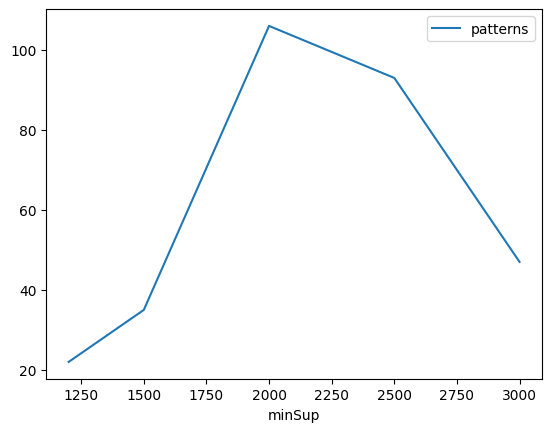

Graph for No Of Patterns is successfully generated!


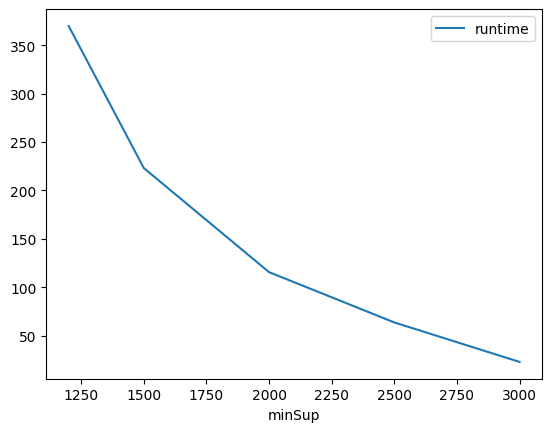

Graph for Runtime taken is successfully generated!


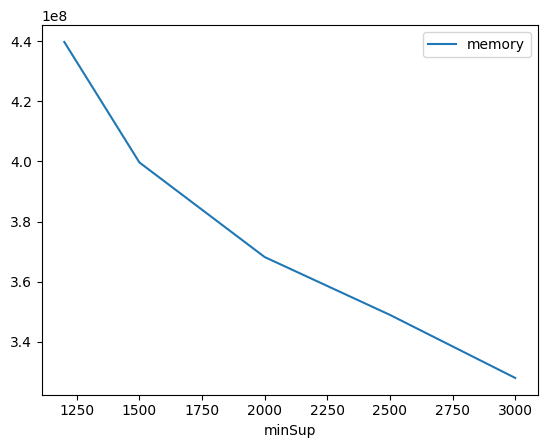

Graph for memory consumption is successfully generated!


In [17]:
ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

### Step 6: Saving the results as latex files

In [18]:
from PAMI.extras.graph import generateLatexFileFromDataFrame as gdf
gdf.generateLatexCode(result)

Latex files generated successfully
